## Dimensionality Reduction with PCA
### Step-by-step with [code.likeagirl.io](https://code.likeagirl.io/principal-component-analysis-dimensionality-reduction-technique-step-by-step-approach-ffd46623ff67)

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(file_name, sep=',',header=None)
df.head(n=10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


We will reduce the above 4D data set to a 2D one.

In [4]:
# extract the last column of the data set
class_label = pd.DataFrame(df.iloc[:,-1])
class_label.columns = ['label']
df = df.iloc[:, :-1]
df.head(n=10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
# normalize the data
df = df.sub(df.mean(axis=0), axis=1)

In [6]:
# calculate covariance
df_mat = np.asmatrix(df)
sigma = np.cov(df_mat.T)

In [7]:
# find eigen values and eigen vectors
eigVals, eigVec = np.linalg.eig(sigma)

In [8]:
# sort eighen values and vectors
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [9]:
# select the top k eigen values and corresponding eigen vectors
eigVec = eigVec[:,:2]

In [10]:
# form the new data set in reduced dimensions
transformed = df_mat.dot(eigVec)

In [11]:
# attach the class label to this new data set

#horizontally stack transformed data set with class label.
final_df = np.hstack((transformed, class_label))
#convert the numpy array to data frame
final_df = pd.DataFrame(final_df)
#define the column names
final_df.columns = ['x','y','label']

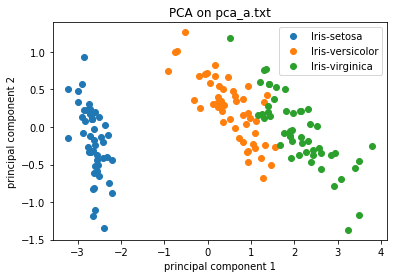

In [12]:
# plot the new data set
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    axes.set_title("PCA on pca_a.txt")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()